# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [2]:
from utils import get_dataset
from PIL import Image, ImageStat, ImageOps
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf
import seaborn as sns

%matplotlib inline

In [3]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 25
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    images = []
    bboxes = []
    classes = []
    
    count = 0 
    
        
    #iterate through the batch and get all the images, bounding boxes and classes
    for data in batch:
        images.append(np.array(data['image'], dtype="uint8"))
        bboxes.append(np.array(data['groundtruth_boxes'], dtype="float32"))
        classes.append(np.array(data['groundtruth_classes'], dtype="int64"))
        count += 1

    # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}

    #create figure and axes
    fig, ax = plt.subplots(5, 2, figsize =(50,50))

    for i in range(count):
        #get x and y for the axes
        x = i % 5
        y = i % 2
        
        #display the image
        ax[x,y].imshow(images[i])
        
        #list of bounding boxes for the current image
        b_box = bboxes[i]
        
        #list of classes for the current image
        b_class = classes[i]
        
        #use the built-in zip function to link the two lists as we iterate
        for cl, bb in zip(b_class, b_box):
            
            #get the image width and height
            w, h, _ = images[i].shape
            
            #get the coordinates of the bottom left and top right of each box
            y1, x1, y2, x2  = bb
            
            #resize the boxes to the current image size.
            x1, x2 = x1 * w, x2 * w
            y1, y2 = y1 * h, y2 * h
                
            #create a rectangle from those points with the edgecolor matching the color set for the class
            rec = patches.Rectangle((x1,y1), x2-x1, y2-y1, fc='none', ec=colormap[cl])
            
            #Add the patch to the current ax
            ax[x,y].add_patch(rec)
            
            #define the interesting area of the image
            ax[x,y].set_xlim([0, 640])
            ax[x,y].set_ylim([640, 0])
            
    plt.tight_layout()
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

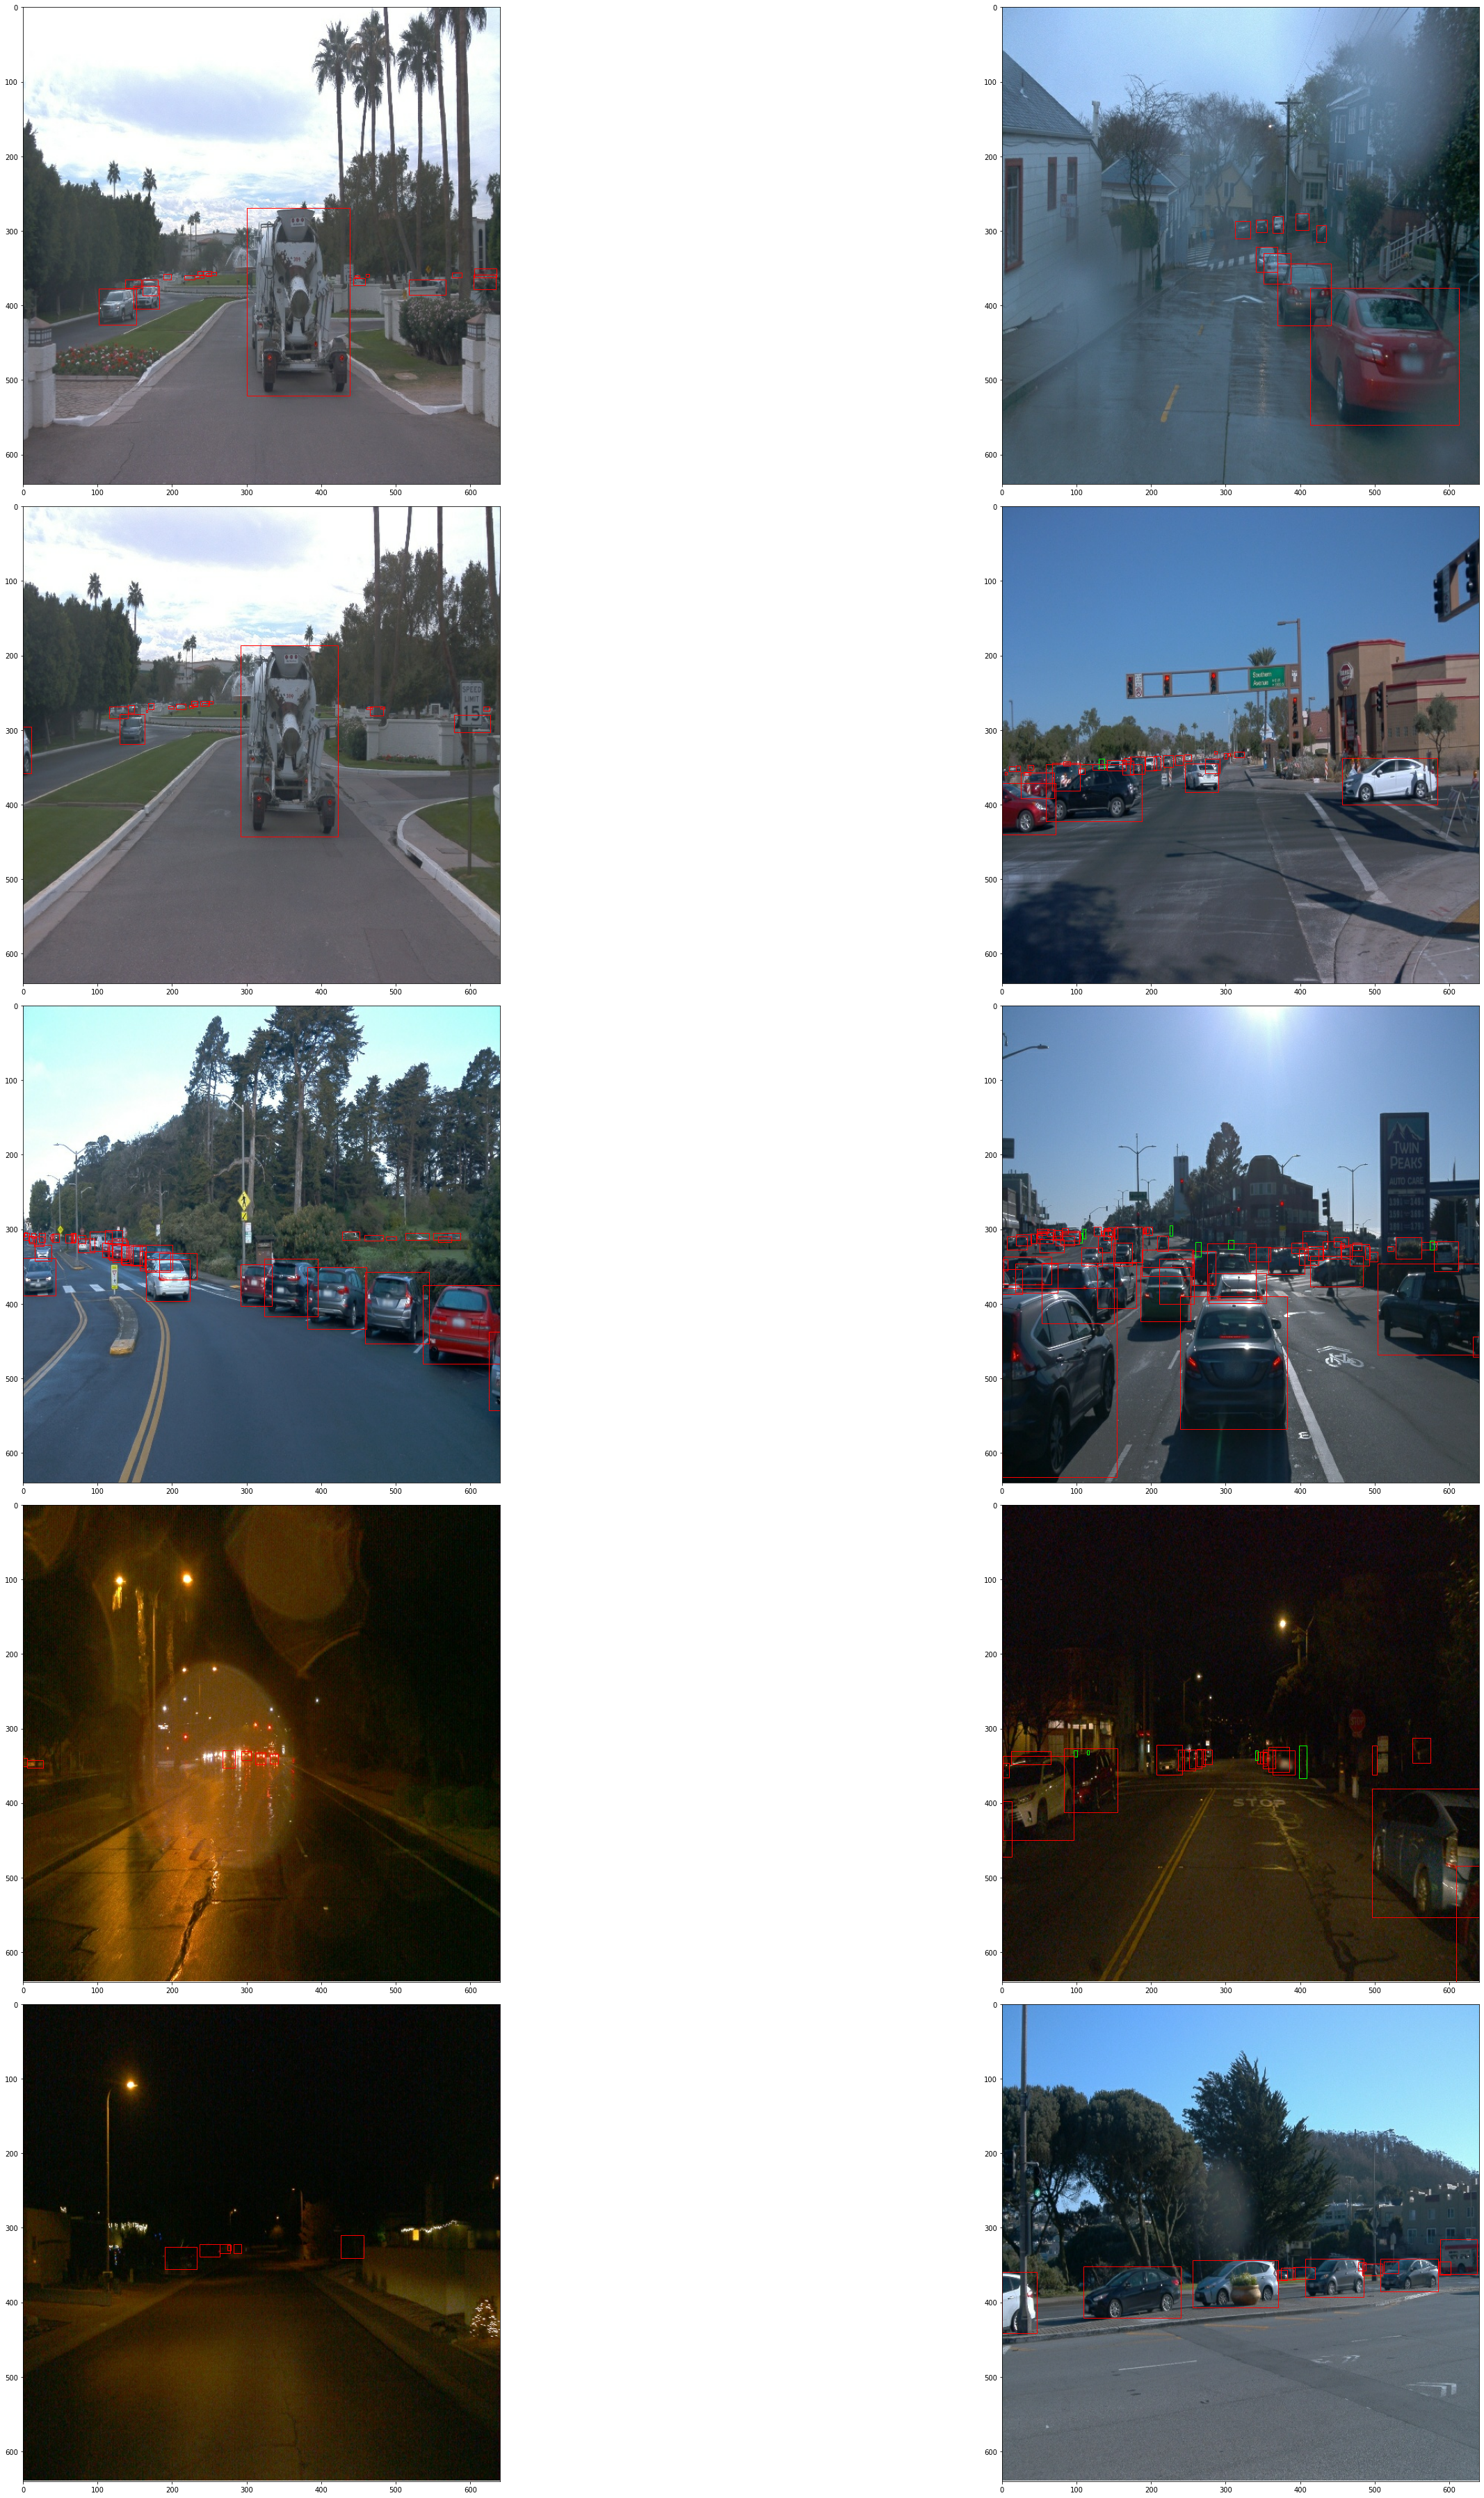

In [5]:
qt = 10
batch = dataset.take(qt)
display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

[Text(0.5, 0, 'Image Mean Brigtness'),
 Text(0, 0.5, 'Number of Images'),
 Text(0.5, 1.0, 'Distrubution of Images Mean Brightness')]

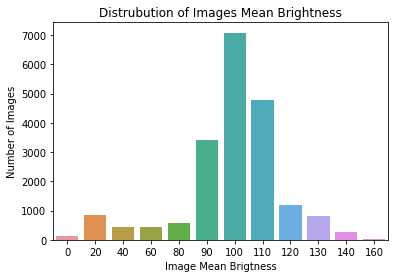

In [13]:
images = []
i = 0
almost_black = [] #0 to 15
ultra_dark = [] #>15 t0 30
extremely_dark = [] #>30 to 45
very_dark = [] #>45 to 60
dark = [] #>60 to 75
slightly_dark = [] #75 to 90
kinda_dark = [] #>90 to 105
still_dark = [] #>105 to 120
good_brightness = [] #>120 to 130
very_bright = [] #>130 to 145
insanely_bright = [] #>145 to 160
almost_white = [] #>160

batch = dataset.take(20000)
for data in batch:
    images.append(np.array(data["image"], dtype="uint8"))
    im = Image.fromarray(images[i])
    gray_image = ImageOps.grayscale(im)
    stat = ImageStat.Stat(gray_image)
    if(stat.mean[0] <= 15):
        almost_black.append(stat.mean[0])
    elif(stat.mean[0] > 15 and stat.mean[0] <= 30):
        ultra_dark.append(stat.mean[0])
    elif(stat.mean[0] > 30 and stat.mean[0] <= 45):
        extremely_dark.append(stat.mean[0])
    elif(stat.mean[0] > 45 and stat.mean[0] <= 60):
        very_dark.append(stat.mean[0])
    elif(stat.mean[0] > 60 and stat.mean[0] <= 75):
        dark.append(stat.mean[0])
    elif(stat.mean[0] > 75 and stat.mean[0] <= 90):
        slightly_dark.append(stat.mean[0])
    elif(stat.mean[0] > 90 and stat.mean[0] <= 105):
        kinda_dark.append(stat.mean[0])
    elif(stat.mean[0] > 105 and stat.mean[0] <= 120):
        still_dark.append(stat.mean[0])
    elif(stat.mean[0] > 120 and stat.mean[0] <= 130):
        good_brightness.append(stat.mean[0])
    elif(stat.mean[0] > 130 and stat.mean[0] <= 145):
        very_bright.append(stat.mean[0])
    elif(stat.mean[0] > 145 and stat.mean[0] <= 160):
        insanely_bright.append(stat.mean[0])
    elif(stat.mean[0] > 160):
        almost_white.append(stat.mean[0])
    i += 1

label_map = {"0":len(almost_black), "20":len(ultra_dark), "40":len(extremely_dark),"60":len(very_dark),"80":len(dark),
             "90":len(slightly_dark), "100":len(kinda_dark),"110":len(still_dark), "120":len(good_brightness),
             "130":len(very_bright),"140":len(insanely_bright),"160":len(almost_white)}
keys = list(label_map.keys())
vals = [label_map[k] for k in keys]
    


# plot
ax = sns.barplot(x=keys, y=vals)
ax.set(xlabel='Image Mean Brigtness', ylabel='Number of Images', title='Distrubution of Images Mean Brightness')